## The first algorithm of Remez

- Fails in some situations.

- Recommend second algorithm.

In [1]:
import numpy as np
import sympy as sy
from scipy.optimize import minimize_scalar, root
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class Error(Exception):
    pass

In [3]:
def solve_f_pn_E(fx, xn, n):
    x = sy.Symbol("x")
    f = lambda x: eval(fx)
    P = sy.Matrix(np.array([[xi**i for i in range(n + 1)] for xi in xn]))
    E = sy.Matrix(np.array([[(-1) ** i] for i in range(n + 2)]))
    A = sy.Matrix(np.concatenate((P, E), axis=1))
    F = sy.Matrix([[f(xi)] for xi in xn])
    a = sy.symarray("a", n + 2).reshape(n + 2, 1)
    an = sy.solve(A * a - F)
    an = np.array([[value] for key, value in an.items()])
    e, an = an[-1, 0], an[:-1, 0]

    px = f"{an[0]}"
    for i in range(1, n + 1):
        px = px + f"+{an[i]}*x**{i}"
    pn = lambda x: eval(px)
    err = lambda x: eval(fx) - eval(px)
    minus_abs_err = lambda x: -abs(err(x))
    max_err = minimize_scalar(minus_abs_err, bounds=(-1, 1), method="bounded")
    f_pn_superr = lambda x: abs(eval(fx) - eval(px)) - max_err.fun
    xn_root = np.array(root(f_pn_superr, xn, options={"xtol": 1e-50}).x)
    xn_root.sort()
    return xn_root, max_err.fun, e, px

In [4]:
def remez_algorithm(fx="np.sin(x)", n=2):
    """
    fx is the string-like-function that we want to give the polynomials of best uniform approximation.
    n is the order for the polynomials, so pn(x) is like (a0 + a1*x + a2*x**2 + ...+ an*x**n).
    Consider interval [-1, 1] only.
    """

    xn = np.array([np.cos(((2 * k + 1) * np.pi) / (2 * (n + 2))) for k in range(n + 2)])
    xn.sort()

    my_iter, min_max_err = 1, np.inf
    print(f"iter {my_iter}")
    xn_root, max_err1, e, px = solve_f_pn_E(fx, xn, n)
    while my_iter < 20:
        if min_max_err is max_err1:
            break
        elif (xn == xn_root).all():
            break
        elif len(xn) == len(xn_root):
            my_iter += 1
            print(f"iter {my_iter}")
            xn = xn_root
            xn_root, max_err2, e, px = solve_f_pn_E(fx, xn, n)
            if max_err2 < max_err1:
                min_max_err, max_err1 = max_err2, max_err2
            else:
                min_max_err, max_err1 = max_err1, max_err2
        else:
            raise Error("Different size of xn and xn_root.")
    min_max_err = max_err1 if my_iter == 1 else min_max_err
    print(f"f(x)={fx}, n={n}\npn(x)={px}\nmax error:{min_max_err}\npoints:\n{xn}")
    return px, xn

iter 1
iter 2
f(x)=4*x**4+2*x**3-5*x**2+8*x-5/2, n=3
pn(x)=-2.50019535501195+7.99553542795768*x**1+-1.87643549846747*x**2+2.00571820014186*x**3
max error:-0.6109904274407114
points:
[-8.83680608e-01 -8.83609374e-01  8.39686409e-04  8.83609374e-01
  8.83680839e-01]


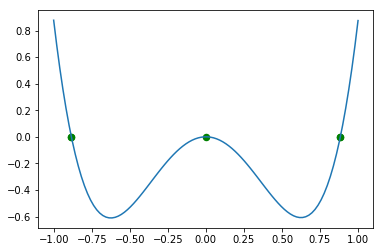

iter 1
f(x)=4*x**4+2*x**3-5*x**2+8*x-5/2, n=4
pn(x)=-2.50000000000000+7.99999999999999*x**1+-4.99999999999998*x**2+1.99999999999999*x**3+4.00000000000000*x**4
max error:-4.263256414560601e-14
points:
[-0.96592583 -0.70710678 -0.25881905  0.25881905  0.70710678  0.96592583]


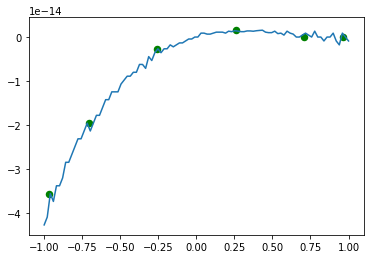

iter 1
iter 2
f(x)=np.sin(x), n=2
pn(x)=-1.76625666557718E-8+0.896672138206154*x**1+2.71750737009781E-8*x**2
max error:-0.03155012405973878
points:
[-0.80050502 -0.79967817  0.79967817  0.80050503]


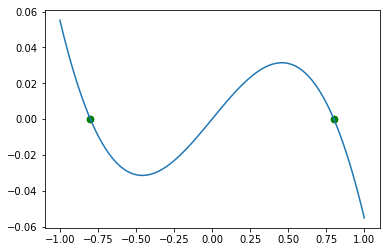

iter 1
f(x)=np.sin(x), n=3
pn(x)=2.50106949495631E-16+0.997472270956549*x**1+-1.71119193009254E-19*x**2+-0.156494813254963*x**3
max error:-0.0005043855833186117
points:
[-9.51056516e-01 -5.87785252e-01  6.12323400e-17  5.87785252e-01
  9.51056516e-01]


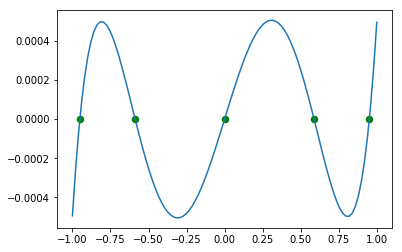

iter 1
iter 2
f(x)=np.sin(x), n=4
pn(x)=-0.0000718272096043569+0.997892165321800*x**1+0.000320422343728232*x**2+-0.157218541064660*x**3+-0.000276426199544096*x**4
max error:-0.00044551673181542073
points:
[-0.92487294 -0.5516787  -0.55115428  0.55115422  0.55161717  0.92487294]


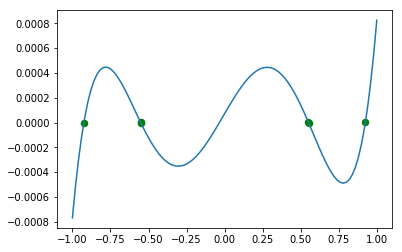

iter 1
f(x)=np.sin(x), n=5
pn(x)=1.11840528261278E-16+0.999978820123569*x**1+-1.34673150009591E-15*x**2+-0.166496931003949*x**3+1.07714949014031E-15*x**4+0.00799207939075348*x**5
max error:-3.023600312235253e-06
points:
[-9.74927912e-01 -7.81831482e-01 -4.33883739e-01  6.12323400e-17
  4.33883739e-01  7.81831482e-01  9.74927912e-01]


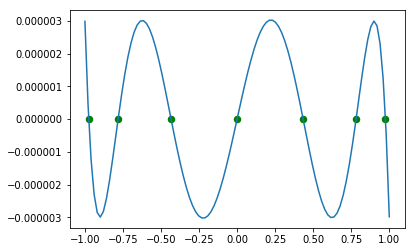

iter 1
iter 2
f(x)=np.sin(x), n=6
pn(x)=-0.00000715755526690280+0.999982665872633*x**1+0.0000622513890891132*x**2+-0.166515663571381*x**3+-0.000132868593748083*x**4+0.00800943779196379*x**5+0.0000800591963350918*x**6
max error:-8.136673926212312e-06
points:
[-0.95930044 -0.75397095 -0.41392348 -0.41347325 -0.41337963  0.41339292
  0.75398068  0.95929586]


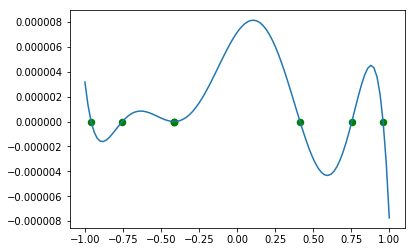

iter 1
f(x)=np.sin(x), n=7
pn(x)=-8.48546755031069E-17+0.999999905081521*x**1+2.41319254808076E-15*x**2+-0.166665400218816*x**3+-8.32881518177391E-15*x**4+0.00832876566571945*x**5+6.02218465216458E-15*x**6+-0.000192296171185077*x**7
max error:-1.052242581955909e-08
points:
[-9.84807753e-01 -8.66025404e-01 -6.42787610e-01 -3.42020143e-01
  6.12323400e-17  3.42020143e-01  6.42787610e-01  8.66025404e-01
  9.84807753e-01]


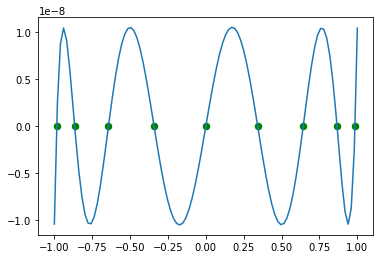

iter 1
iter 2
f(x)=np.sin(x), n=8
pn(x)=1.87141643727236E-10+0.999999922943381*x**1+-4.81410548257541E-9*x**2+-0.166665566954591*x**3+2.09361063968339E-8*x**4+0.00832913897618648*x**5+-3.13902267194624E-8*x**6+-0.000192529037282513*x**7+1.53035761244329E-8*x**8
max error:-9.636265341228523e-09
points:
[-9.77313565e-01 -8.45953198e-01 -6.22243786e-01 -3.29502427e-01
  5.85397700e-04  3.29132177e-01  6.19275813e-01  6.21938876e-01
  8.46243181e-01  9.77561086e-01]


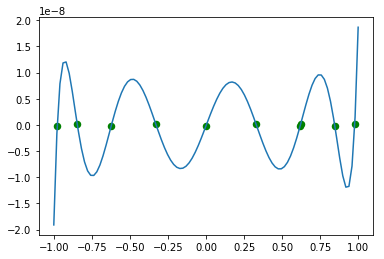

iter 1
iter 2
f(x)=np.exp(x), n=2
pn(x)=0.994820512628767+1.11175243893494*x**1+0.542404999358775*x**2
max error:-0.033778262643874846
points:
[-0.78491459 -0.78284602  0.04746144  0.82321903]


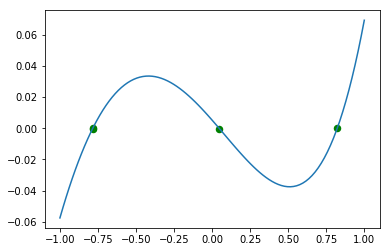

iter 1
iter 2
f(x)=np.exp(x), n=3
pn(x)=0.999993099852206+1.00862964797197*x**1+0.528707673499114*x**2+0.160634736425749*x**3
max error:-0.008170858775856216
points:
[-0.79484311 -0.326482   -0.32604572  0.00096544  0.82885021]


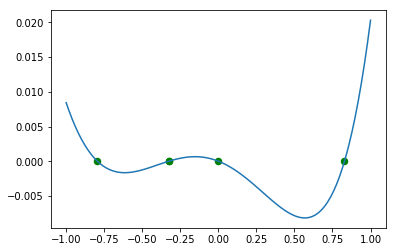

iter 1
iter 2
f(x)=np.exp(x), n=4
pn(x)=1.00004526799638+0.997742461942411*x**1+0.499194353054024*x**2+0.176603094573016*x**3+0.0437925432011790*x**4
max error:-0.0004232580950798148
points:
[-0.92336764 -0.53867386  0.01990537  0.56739154  0.56744945  0.93009866]


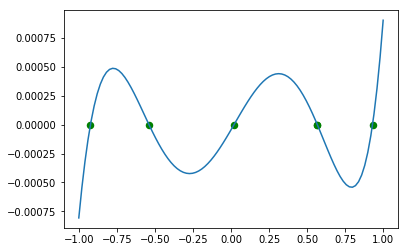

iter 1
iter 2
f(x)=np.exp(x), n=5
pn(x)=1.00005294872031+1.00018937696498*x**1+0.499484932773929*x**2+0.165547317559599*x**3+0.0433914074078865*x**4+0.00956150481971672*x**5
max error:-6.70126533806048e-05
points:
[-0.92117206 -0.45840531 -0.25671863 -0.20354845  0.53663334  0.86809238
  0.92815688]


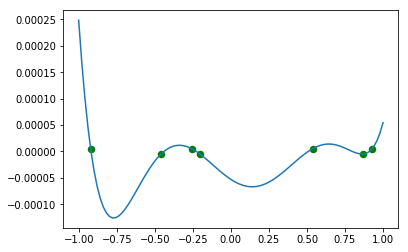

iter 1
iter 2
f(x)=np.exp(x), n=6
pn(x)=0.999999777551437+1.00001841927342*x**1+0.500006690910051*x**2+0.166507161047426*x**3+0.0416342035086332*x**4+0.00867046672527861*x**5+0.00143975998820294*x**6
max error:-2.555600667308866e-06
points:
[-0.96335146 -0.74982313 -0.4038611   0.01188942  0.42305166  0.42330717
  0.7599472   0.96518488]


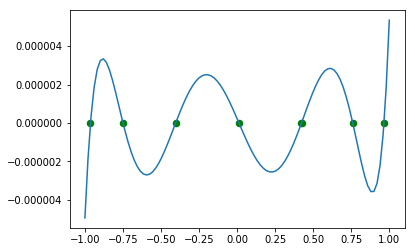

iter 1
iter 2
iter 3
f(x)=np.exp(x), n=7
pn(x)=0.999999996848484+0.999999192144896*x**1+0.500000314304157*x**2+0.166681152670709*x**3+0.0416539480310846*x**4+0.00829389534973613*x**5+0.00142535318732921*x**6+0.000227802496922279*x**7
max error:-1.5212126247554636e-07
points:
[-0.95696486 -0.71729901 -0.24213416 -0.24210177 -0.00386623  0.29330897
  0.75645078  0.95777515  0.95779773]


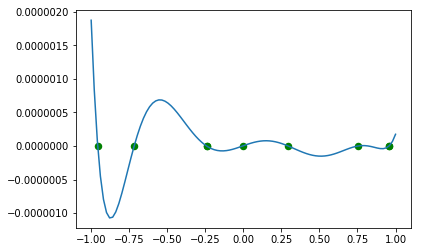

iter 1
iter 2
f(x)=np.exp(x), n=8
pn(x)=1.00000000000977+0.999999996625932*x**1+0.500000033156997*x**2+0.166667146781967*x**3+0.0416669901359245*x**4+0.00833029051786203*x**5+0.00138777389145835*x**6+0.000203729376508438*x**7+0.0000258423268723917*x**8
max error:-1.636803781401852e-08
points:
[-0.97522448 -0.84413381 -0.33817029 -0.15643447 -0.00789121  0.01848843
  0.62707449  0.82622827  0.97630335  0.97640119]


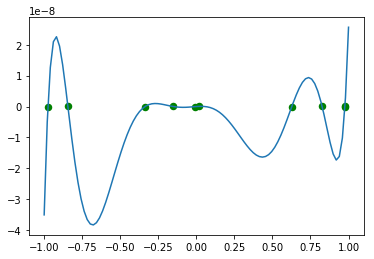

iter 1
f(x)=np.log(2+x), n=2
pn(x)=0.695490383362930+0.530784957824409*x**1+-0.143346048314088*x**2
max error:-0.009401643765655554
points:
[-0.92387953 -0.38268343  0.38268343  0.92387953]


C:\Users\13161\Anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


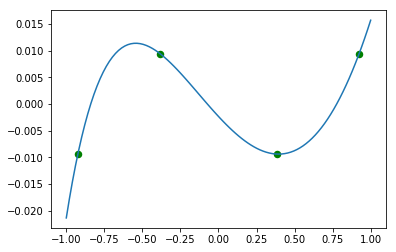

iter 1
f(x)=np.log(2+x), n=3
pn(x)=0.695043016298447+0.497505953950696*x**1+-0.141705502467097*x**2+0.0511876743696313*x**3
max error:-0.001985701590429101
points:
[-9.51056516e-01 -5.87785252e-01  6.12323400e-17  5.87785252e-01
  9.51056516e-01]


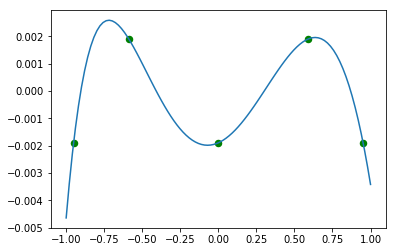

iter 1
f(x)=np.log(2+x), n=4
pn(x)=0.693036380906094+0.497862375199167*x**1+-0.123026813099734*x**2+0.0505272859849350*x**3+-0.0205659604341737*x**4
max error:-0.00040862991919632385
points:
[-0.96592583 -0.70710678 -0.25881905  0.25881905  0.70710678  0.96592583]


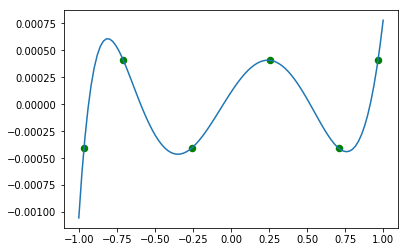

iter 1
f(x)=np.log(2+x), n=5
pn(x)=0.693056274364354+0.500177410060458*x**1+-0.123253047570076*x**2+0.0402825577778210*x**3+-0.0202827898938760*x**4+0.00881448075316005*x**5
max error:-0.00011213443384422428
points:
[-9.74927912e-01 -7.81831482e-01 -4.33883739e-01  6.12323400e-17
  4.33883739e-01  7.81831482e-01  9.74927912e-01]


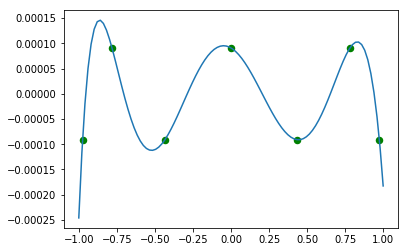

iter 1
f(x)=np.log(2+x), n=6
pn(x)=0.693153103397109+0.500151140099496*x**1+-0.125188324393144*x**2+0.0404158907852905*x**3+-0.0147156960591603*x**4+0.00868800823802345*x**5+-0.00393548392071395*x**6
max error:-2.318606652684796e-05
points:
[-0.98078528 -0.83146961 -0.55557023 -0.19509032  0.19509032  0.55557023
  0.83146961  0.98078528]


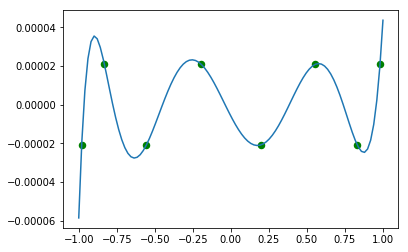

iter 1
f(x)=np.log(2+x), n=7
pn(x)=0.693152073304793+0.499987337537649*x**1+-0.125164511320594*x**2+0.0418328644545399*x**3+-0.0147916725370538*x**4+0.00567677114414358*x**5+-0.00387737738969451*x**6+0.00180739107641885*x**7
max error:-4.894341986028117e-06
points:
[-9.84807753e-01 -8.66025404e-01 -6.42787610e-01 -3.42020143e-01
  6.12323400e-17  3.42020143e-01  6.42787610e-01  8.66025404e-01
  9.84807753e-01]


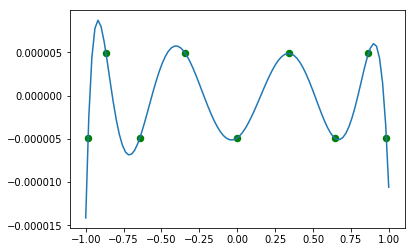

iter 1
f(x)=np.log(2+x), n=8
pn(x)=0.693146842020531+0.499989245284290*x**1+-0.124983144715541*x**2+0.0418144549618199*x**3+-0.0157568470043438*x**4+0.00571928120361493*x**5+-0.00225290286532415*x**6+0.00178013573236948*x**7+-0.000847372893194176*x**8
max error:-1.4476641959082492e-06
points:
[-0.98768834 -0.89100652 -0.70710678 -0.4539905  -0.15643447  0.15643447
  0.4539905   0.70710678  0.89100652  0.98768834]


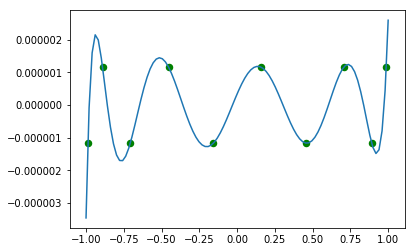

iter 1
f(x)=np.sqrt(1+x**2), n=2
pn(x)=1.01051027364610+0.0*x**1+0.411154600065121*x**2
max error:-0.010510273646100021
points:
[-0.92387953 -0.38268343  0.38268343  0.92387953]


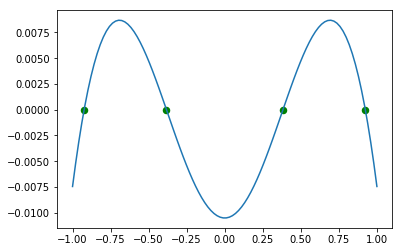

iter 1
iter 2
iter 3
f(x)=np.sqrt(1+x**2), n=3
pn(x)=1.00303103955209+2.36593819326710E-10*x**1+0.432259185229753*x**2+-2.30520329835215E-9*x**3
max error:-0.007584854814524533
points:
[-0.81363325 -0.2215823   0.22151851  0.2215823   0.81363328]


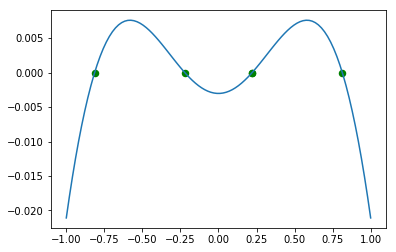

iter 1
f(x)=np.sqrt(1+x**2), n=4
pn(x)=1.00093907675129+-5.11831311406684E-17*x**1+0.482559188159027*x**2+6.82441748542245E-17*x**3+-0.0698951977568529*x**4
max error:-0.0008255542187973752
points:
[-0.96592583 -0.70710678 -0.25881905  0.25881905  0.70710678  0.96592583]


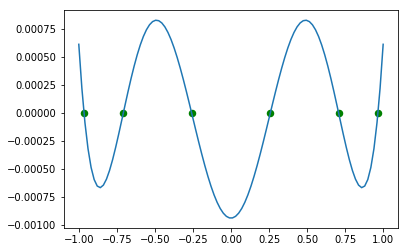

iter 1
iter 2
f(x)=np.sqrt(1+x**2), n=5
pn(x)=1.00025781751351+-1.63950076854022E-8*x**1+0.487948641296917*x**2+5.93690516492303E-8*x**3+-0.0757052779613434*x**4+-4.59574388887896E-8*x**5
max error:-0.00091687938365137
points:
[-9.45941280e-01 -6.56729636e-01 -2.32119572e-01  2.82462844e-04
  2.32117736e-01  6.56729496e-01  9.45941274e-01]


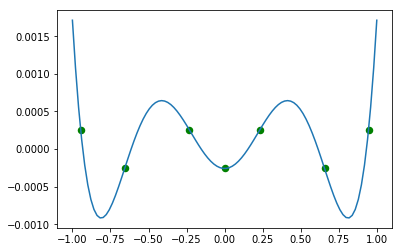

iter 1
f(x)=np.sqrt(1+x**2), n=6
pn(x)=1.00010317276677+7.37554517372313E-17*x**1+0.496631697764475*x**2+-3.31617689039663E-16*x**3+-0.106308172600895*x**4+2.51808509125072E-16*x**5+0.0238505278156846*x**6
max error:-0.00010317276676996556
points:
[-0.98078528 -0.83146961 -0.55557023 -0.19509032  0.19509032  0.55557023
  0.83146961  0.98078528]


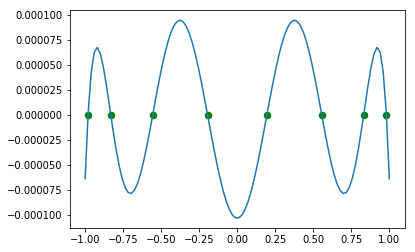

iter 1
f(x)=np.sqrt(1+x**2), n=7
pn(x)=1.00007078026863+2.90326626221874E-17*x**1+0.497276055461231*x**2+-1.38912614611054E-16*x**3+-0.108191021199403*x**4+2.06054959724764E-16*x**5+0.0252077103971216*x**6+-9.66023502437375E-17*x**7
max error:-7.078026862994413e-05
points:
[-9.84807753e-01 -8.66025404e-01 -6.42787610e-01 -3.42020143e-01
  6.12323400e-17  3.42020143e-01  6.42787610e-01  8.66025404e-01
  9.84807753e-01]


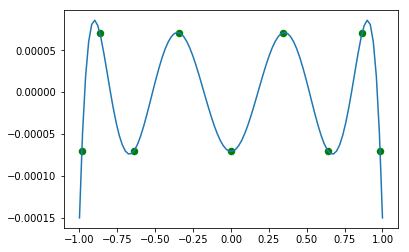

iter 1
f(x)=np.sqrt(1+x**2), n=8
pn(x)=1.00001259337855+-4.51506215342484E-16*x**1+0.499361526483022*x**2+4.35723554694890E-15*x**3+-0.119515847007807*x**4+-1.02726074070061E-14*x**5+0.0445398394403796*x**6+6.38636912322722E-15*x**7+-0.0101920545050036*x**8
max error:-1.2593378549974332e-05
points:
[-0.98768834 -0.89100652 -0.70710678 -0.4539905  -0.15643447  0.15643447
  0.4539905   0.70710678  0.89100652  0.98768834]


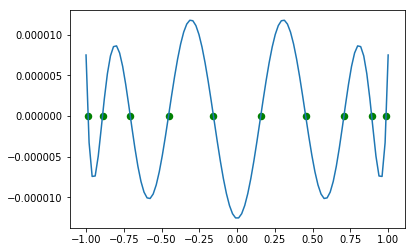

iter 1
f(x)=(1+x**2)**-1, n=2
pn(x)=0.941176470588235+0.0*x**1+-0.470588235294117*x**2
max error:-0.05882352941176505
points:
[-0.92387953 -0.38268343  0.38268343  0.92387953]


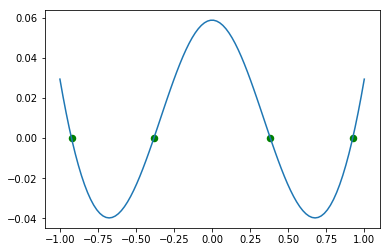

iter 1
iter 2
f(x)=(1+x**2)**-1, n=3
pn(x)=0.999411716825148+-1.37008858952082E-7*x**1+-0.574560373673660*x**2+1.86771930960415E-7*x**3
max error:-0.05797691829939566
points:
[-0.86041623 -0.85777374  0.00912957  0.85777374  0.86041623]


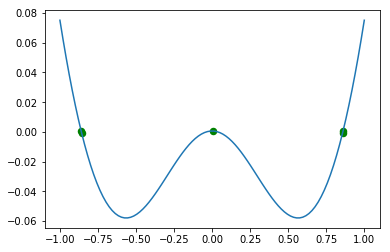

iter 1
f(x)=(1+x**2)**-1, n=4
pn(x)=0.989898989898991+8.57099128710968E-17*x**1+-0.808080808080810*x**2+-1.14279883828129E-16*x**3+0.323232323232324*x**4
max error:-0.0081342313717645
points:
[-0.96592583 -0.70710678 -0.25881905  0.25881905  0.70710678  0.96592583]


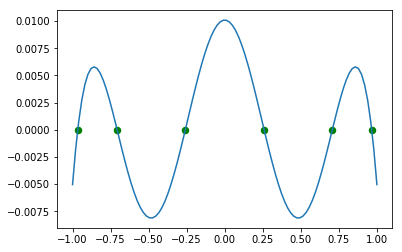

iter 1
iter 2
f(x)=(1+x**2)**-1, n=5
pn(x)=1.00005326467326+0.0598431379127938*x**1+-0.861601542807658*x**2+-0.210826610240320*x**3+0.374135125002426*x**4+0.161818868481283*x**5
max error:-0.022112734215858687
points:
[-0.94072912 -0.93451198 -0.64643966 -0.00192716  0.64643969  0.94030087
  0.94072912]


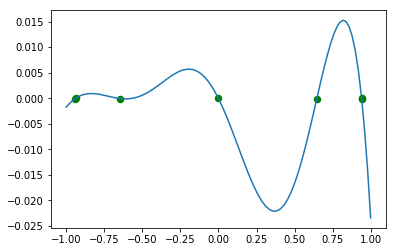

iter 1
f(x)=(1+x**2)**-1, n=6
pn(x)=0.998266897746967+-2.21631689004313E-15*x**1+-0.942807625649914*x**2+7.99548555421302E-15*x**3+0.665511265164647*x**4+-6.05467950728475E-15*x**5+-0.221837088388218*x**6
max error:-0.0017331022530330253
points:
[-0.98078528 -0.83146961 -0.55557023 -0.19509032  0.19509032  0.55557023
  0.83146961  0.98078528]


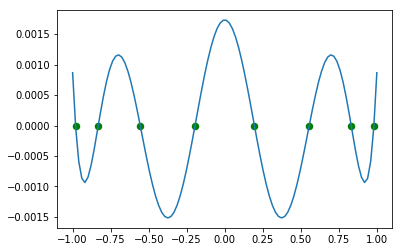

iter 1
iter 2
f(x)=(1+x**2)**-1, n=7
pn(x)=0.999994635241791+0.00203033636028482*x**1+-0.961510663809193*x**2+-0.0132355762606680*x**3+0.710977172308967*x**4+0.0242808439468214*x**5+-0.251467511438843*x**6+-0.0132867528549915*x**7
max error:-0.001912647052702554
points:
[-9.70928425e-01 -7.90991105e-01 -7.90312797e-01 -5.08987598e-01
  5.13120628e-07  5.08989912e-01  7.90446031e-01  7.90991115e-01
  9.70928424e-01]


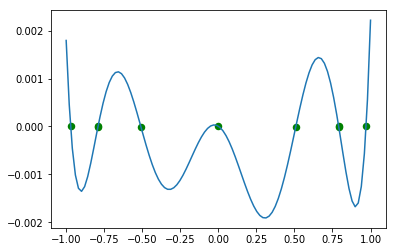

iter 1
f(x)=(1+x**2)**-1, n=8
pn(x)=0.999702646446625+1.09028084268964E-15*x**1+-0.984834968777892*x**2+-1.07421358416641E-14*x**3+0.865893547427960*x**4+2.54286031922488E-14*x**5+-0.532857567648036*x**6+-1.56531963543796E-14*x**7+0.152245019328031*x**8
max error:-0.0002973535533750127
points:
[-0.98768834 -0.89100652 -0.70710678 -0.4539905  -0.15643447  0.15643447
  0.4539905   0.70710678  0.89100652  0.98768834]


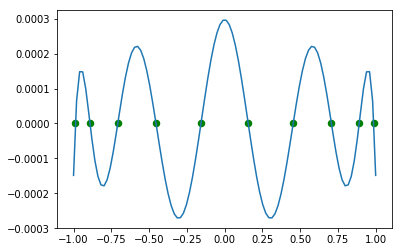

In [5]:
if __name__ == "__main__":

    def err_plot(fx, n):
        plt.figure()
        px, xn = remez_algorithm(fx=fx, n=n)
        err = lambda x: eval(fx) - eval(px)
        x = np.linspace(-1, 1, 100)
        err_y, err_xn = [err(i) for i in x], [err(j) for j in xn]
        plt.plot(x, err_y)
        plt.scatter(xn, err_xn, color="green", linewidth=1.5, linestyle="-")
        plt.show()

    poly = [("4 * x**4 + 2 * x**3 - 5 * x**2 + 8 * x - 2.5", i) for i in [3, 4]]
    sin = [("np.sin(x)", i) for i in range(2, 9)]
    exp = [("np.exp(x)", i) for i in range(2, 9)]
    ln = [("np.log(2+x)", i) for i in range(2, 9)]
    sqrt = [("np.sqrt(1+x**2)", i) for i in range(2, 9)]
    frac = [("(1+x**2)**-1", i) for i in range(2, 9)]
    plot_list = [poly, sin, exp, ln, sqrt, frac]

    for k in range(len(plot_list)):
        for fx, n in plot_list[k]:
            err_plot(fx, n)